<a href="https://colab.research.google.com/github/juhi2021/juhi2021.github.io/blob/main/docs/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Prediction Case Study**

## **Define problem statement**

**Problem Statement :** To create a model which can predict decide whether the applicant is suitable for the loan or in other words to approve or reject the loan application.

**Output Target :** Loan_Status ('Y' means loan is approved and 'N' means loan is rejected)

**Input predictors :** Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoApplicantIncome,LoanAmount, Loan_Amount_Term, Credit_History, Property_Area.

**Solution :** To create a supervised ML classification model, as the target variable is categorical.

## **Load Data**

**Import libraries**

In [1]:
#import pandas for loading the CSV file
import pandas as pd

#import numpy for maths
import numpy as np

# import seaborn for visualization
import seaborn as sns

from scipy import stats 
from sklearn import preprocessing
from collections import Counter

#import matplotlib for graphs
import matplotlib.pyplot as plt

#Feature selection library
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

#To visualise in the notebook
%matplotlib inline

sns.set_style('darkgrid')

# import module
from tabulate import tabulate

# Mount google drive in google colab
#from google.colab import drive
#drive.mount('/content/drive')

#to import the custom module after mounting the drive
import sys
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks')

#custom library for data exploration
from lib import explore_data as ed
from lib.Model import Model

Hello you are in explore_data file


**Read CSV dataset into dataframe**

In [2]:
train_path = '/content/drive/MyDrive/Data/Loan Pred/train.csv'
test_path = r'/content/drive/MyDrive/Data/Loan Pred/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

**Check for duplicate rows and drop the duplicates**

In [3]:
print("Number of duplicate rows {}".format(train_df[train_df.duplicated()].shape[0]))
#drop the duplicates
train_df.drop_duplicates(inplace=True)
print("Number of records after duplicate removal {}".format(train_df.shape[0]))

Number of duplicate rows 0
Number of records after duplicate removal 614


**Define target**

In [4]:
target_var = 'Loan_Status'
y = pd.DataFrame(train_df[target_var])
print("The target variable is '\033[1m{}'\033[1m".format(target_var))

The target variable is 'Loan_Status'


## **Exploratory Data Analysis (EDA)**

### **Basic Data Exploration**



---

**Observe data**

---


**Number of rows and columns**

In [5]:
print("The dataset has {} rows × {} features including the target.".format(train_df.shape[0],train_df.shape[1]))

The dataset has 614 rows × 13 features including the target.


**Data Types for the features**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


**Insight:** There are 3 types of independent Variables - Categorical, Ordinal & Numerical.

In [7]:
#set the index for the concatenated dataset
train_df = train_df.set_index("Loan_ID")
test_df = test_df.set_index("Loan_ID")

**Display sample data**
*   Display the first 5 rows of the dataset along with the target
*   Display the last 5 rows of the dataset along with the target 

In [8]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train_df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


---
**Analyze Target**
---

**Check descriptive statistics for the numeric data**

In [10]:
train_df.describe().append([train_df.select_dtypes(exclude='object').mode().rename({0:'Mode'}, axis='index'), 
               train_df.skew().to_frame().swapaxes(1, 0).rename({0:'Skew'}, axis='index'),
               train_df.kurt().to_frame().swapaxes(1, 0).rename({0:'Kurt'}, axis='index'),
               (train_df.quantile(0.75) - train_df.quantile(0.25)).to_frame().swapaxes(1, 0).rename({0:'IQR'}, axis='index')]).round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00
Mode,2500.00,0.00,120.00,360.00,1.00
Skew,6.54,7.49,2.68,-2.36,-1.88


In [11]:
train_df.describe(include=['O'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


**Find the unique classes for the target variable**

The target value is an ordinal variable with possible values of ['N', 'Y']
Count for category 'Y' is 422
Count for category 'N' is 192
Ratio of target variable categories (Y:N) is 2:1


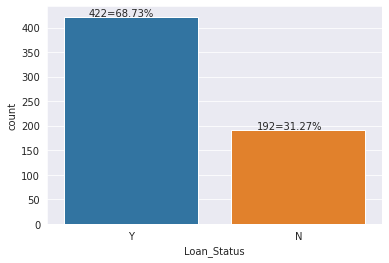

In [12]:
print("The target value is an ordinal variable with possible values of {}".format(sorted(train_df[target_var].unique())))
target_cat_count = Counter(train_df[target_var])
cat_y_count = target_cat_count['Y']
cat_n_count = target_cat_count['N'];
print("Count for category 'Y' is {}".format(cat_y_count))
print("Count for category 'N' is {}".format(cat_n_count))

print("Ratio of target variable categories (Y:N) is {}:{}".format(round(cat_y_count/cat_n_count), round(cat_n_count/cat_n_count)))
ax = sns.countplot(x=target_var, data=train_df)
for p in ax.patches:
  ax.annotate('{}={:.2f}%'.format(p.get_height(), p.get_height()/train_df.shape[0]*100), (p.get_x()+0.15, p.get_height()+1))

**Insight :** The above data shows that there are few data points of the class '0' as compared to class '1'. Hence the dataset is slightly imbalanced. Since the ratio of the imbalance is 1:2, hence we can ignore this imbalance and the problem can often be treated like a normal classification predictive modeling problem.

---
**Analyze input predictors**
---

**List of numerical and categorical features**

In [13]:
# list of numerical variables
num_feat = list(train_df.select_dtypes(exclude='object').columns)
print('numerical variables: ', num_feat)

dis_feat_threshold = 25
dis_feat = [features for features in num_feat if len(train_df[features].unique())<dis_feat_threshold]
print('discrete variables:', dis_feat)

cont_feat = [feature for feature in num_feat if feature not in dis_feat]
print('continuous variables:', cont_feat)

# list of categorical variables
cat_feat = list(train_df.select_dtypes(include='object').columns)
print('categorical variables: ', cat_feat)

numerical variables:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
discrete variables: ['Loan_Amount_Term', 'Credit_History']
continuous variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical variables:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [14]:
# import module
from tabulate import tabulate

#missing data
null_total = train_df.isnull().sum().sort_values(ascending=False)
null_percent = train_df.isnull().sum()/train_df.shape[0]*100
null_percent = pd.concat([null_total, null_percent], axis=1, keys=['Total', 'Percent'])
null_percent.head(20)
print(tabulate(null_percent, headers=('Feature', 'Null Total', 'Null Percent')))

Feature              Null Total    Null Percent
-----------------  ------------  --------------
Credit_History               50        8.14332
Self_Employed                32        5.21173
LoanAmount                   22        3.58306
Dependents                   15        2.443
Loan_Amount_Term             14        2.28013
Gender                       13        2.11726
Married                       3        0.488599
Loan_Status                   0        0
Property_Area                 0        0
CoapplicantIncome             0        0
ApplicantIncome               0        0
Education                     0        0


In [15]:
null_threshold = 15
col_for_drop = null_percent[null_percent>null_threshold].keys().tolist()
print("Features with more than {}% of null values {}".format(null_threshold, col_for_drop))

Features with more than 15% of null values ['Total', 'Percent']


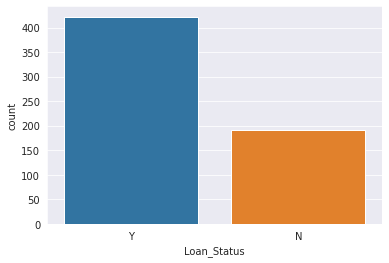

In [16]:
sns.countplot(x=target_var, data=train_df)

## Uni-variate Analysis

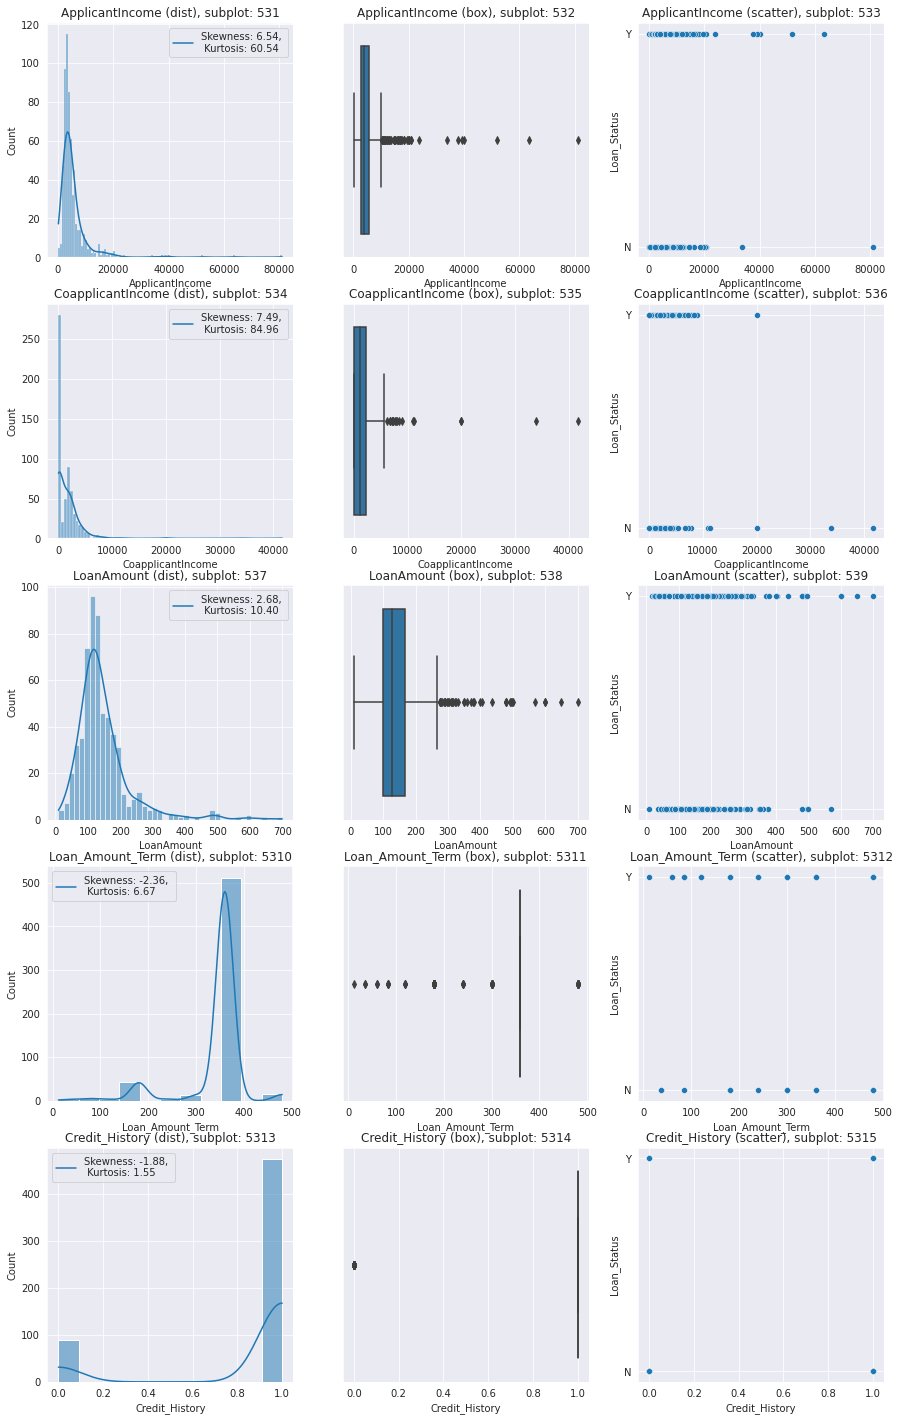

In [17]:
plt = ed.plot_uni_num_data_analysis(train_df, target_var, num_feat, plt)
plt.show()

**Insight:**

For Applicant Income feature:

From Distribution plot:
*   The data is highly negative or left skewed as the skewness is 6.54 (greater than +1)
*   The data has high kurtosis value of 60.54 (>3)
*   The data has heavy-tail or has lots of outliers.
*   Have outliers and most of them are on the right/higher side.
*   Therefore, the feature has non-normal distribution.

From Box plot:
*   Outliers are visible clearly.
*   Outliers concentration more on right side.
*   If the outliers are eliminated then the distribution is almost symmetric.

From Scatter Plot:
*   Most of the values are in 0-20000 range.
*   Outlier values beyond 20000.






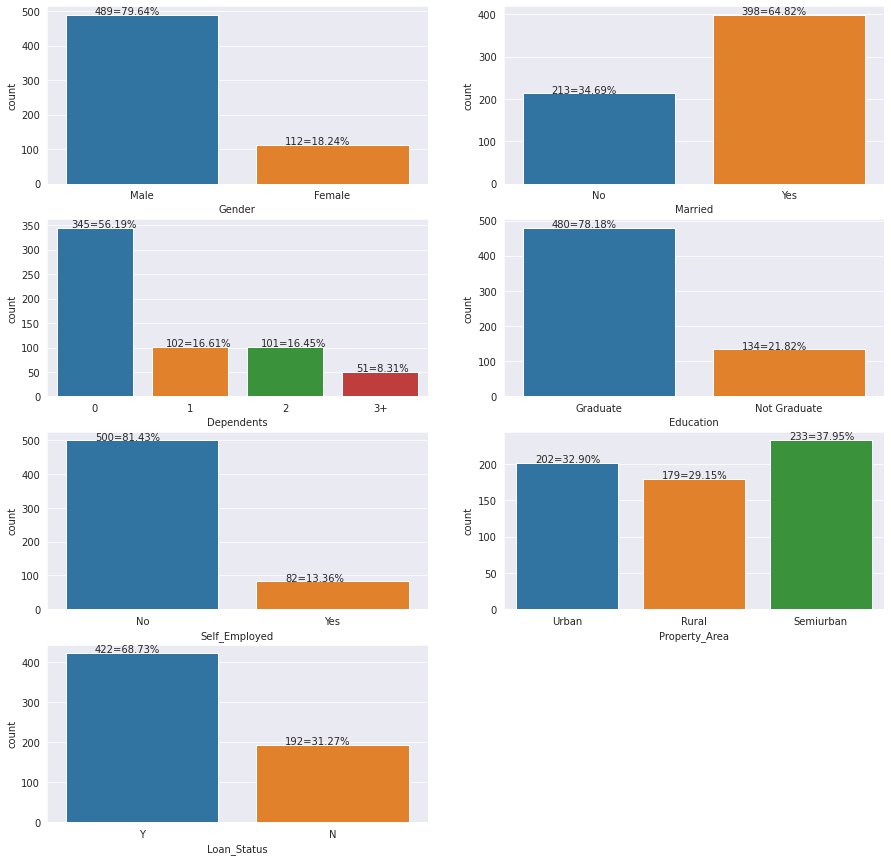

In [18]:
#Visualising categorical Data 
fig = plt.figure(figsize=(15, 15))

fig_counter = 1
no_of_cols = 2

for feature in cat_feat:
  ax = fig.add_subplot(np.ceil(len(cat_feat)/no_of_cols), no_of_cols, fig_counter)
  sns.countplot(data=train_df, x=feature)
  fig_counter =  fig_counter + 1
  for p in ax.patches:
    ax.annotate('{}={:.2f}%'.format(p.get_height(), p.get_height()/train_df.shape[0]*100), (p.get_x()+0.15, p.get_height()+1))

**Insight:** 
*   Around 80% of loan applicants are male.
*   Nearly 65% are married.
*   About 78% of loan applicants are graduates.
*   Nearly 81% loan applicants are self-employed.
*   The loan has been approved for more than 65% of applicants.
*   Almost 56% of the applicants have no dependents.
*   Highest number of applicants are from Semi Urban areas, followed by urban areas and the rural areas have the least number of applicants.


## Bivariate Analysis

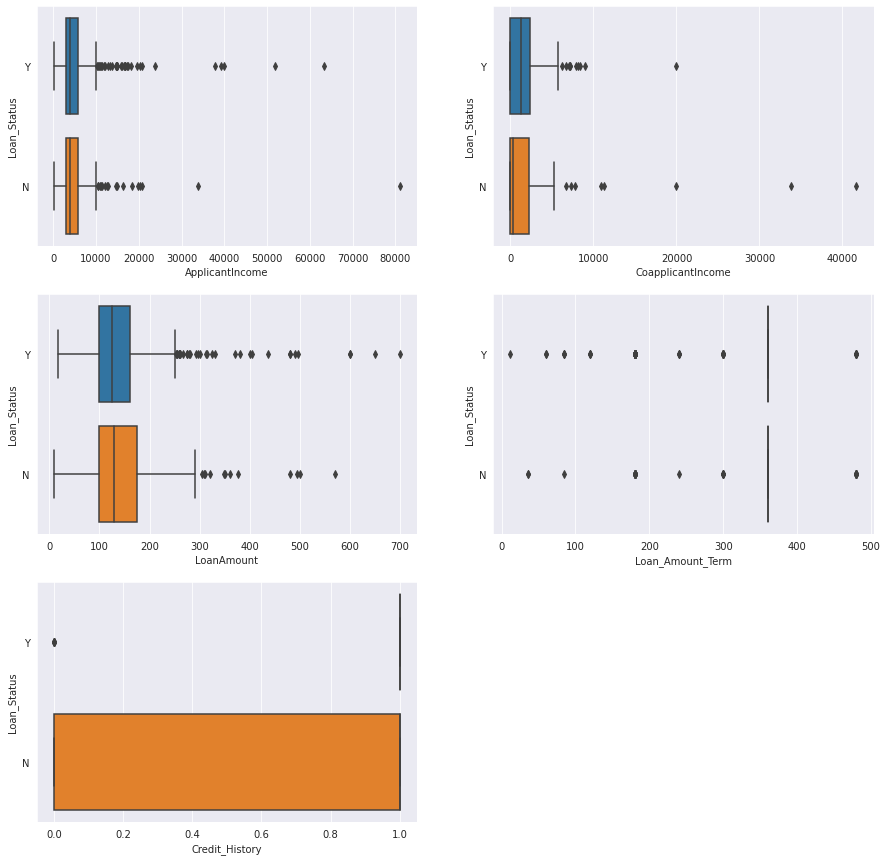

In [20]:
#Visualising numeric feature against target variable
fig = plt.figure(figsize=(15, 15))

fig_counter = 1
no_of_cols = 2

for feature in num_feat:
  ax = fig.add_subplot(np.ceil(len(num_feat)/no_of_cols), no_of_cols, fig_counter)
  sns.boxplot(data=train_df, x=feature, y=target_var)
  fig_counter =  fig_counter + 1

**Insight:**

*   Applicant income, coapplicant's income and Loan_Amount does not affect the chances of loan approval (the median value is same for both Loan_Status and the boxes are in the same line).
*   People with credit history as 1 are more likely to get  loans approved.




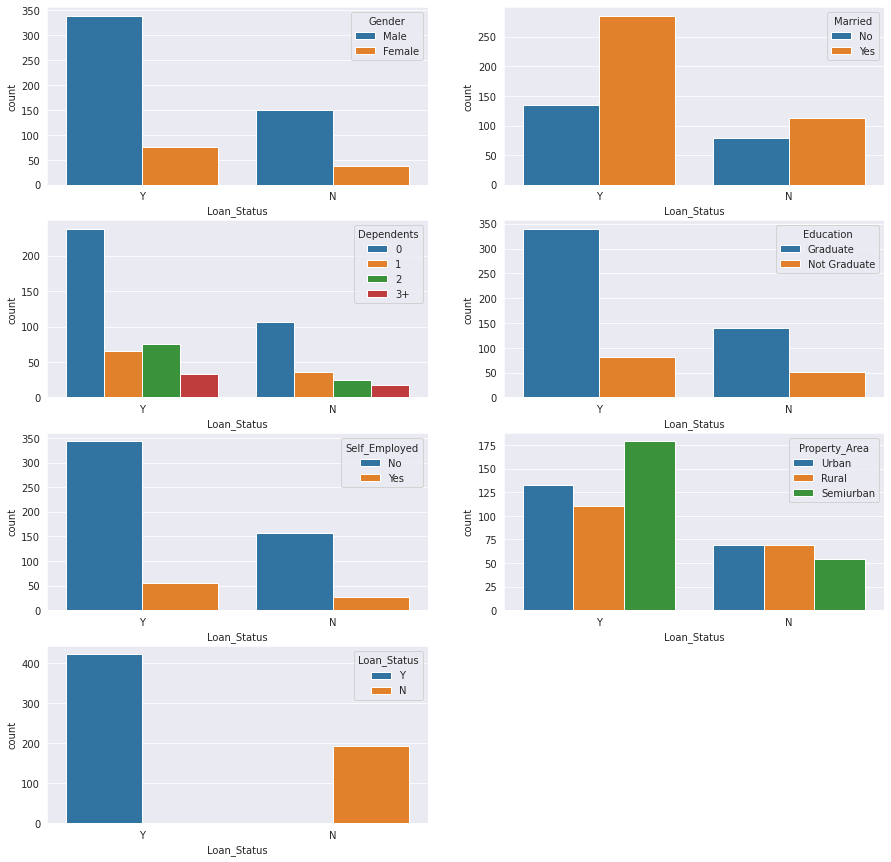

In [21]:
## Lets Find the realtionship between categorical and target variables
fig = plt.figure(figsize=(15, 15))

fig_counter = 1
no_of_cols = 2

for feature in cat_feat:
  ax = fig.add_subplot(np.ceil(len(cat_feat)/no_of_cols), no_of_cols, fig_counter)
  #sns.boxplot(data=train_df, x=feature, y=target_var)
  sns.countplot(hue=feature, x=target_var, data=train_df)
  fig_counter =  fig_counter + 1

**Insight:**
*   There is not a substantial difference between male and female approval rates. But overall males have more loan approval may be because they applyy more.
*   Married applicants have a slightly higher chances of loan approval.
*   Applicants with no dependents have higher chances of approval.
*   Graduates have higher chance of loan approval compared to non-graduates.
*   There is not a substantial difference between Self_Employed and not Self_Employed approval rates.
*   More loans are approved in semiurban area.







**Converting Categorical to Numeric variables**

In [22]:
#Mapp the Y/N to 1/0 in the target variable column so that target becomes numeric and 
#we can find the correlation of the numeric variable to the converted numeric target variable
target_map = {'Y':1,'N':0}
train_df[target_var] = train_df[target_var].map(target_map).astype(int)
y[target_var] = y[target_var].map(target_map).astype(int)

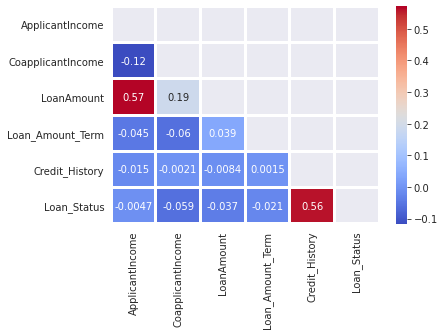

In [23]:
## The relationship between features and target
corr = train_df.corr()

# Getting the Upper Triangle of the corelation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, cmap ='coolwarm', linewidths=2, mask=matrix)

**Insight:**
*   The features 'Loan_Amount', 'ApplicantIncome' and 'Loan_Status', 'Credit_History' has strong positive correlation (depicted by darker shades).
*   There is almost no correlation between 'Loan_Status' and 'ApplicantIncome' (depicted by lighter shades).
*   For feature 'Credit_History' correlation is almost zero against other features.

In [24]:
#Correlation of numeric variables with the target variable
corr['Loan_Status']

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

**Insight:** Credit_History is strongly correlated with the target variable 'Loan_Status'.

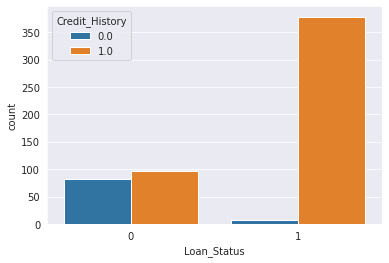

In [25]:
#Discrete variables and target
sns.countplot(x='Loan_Status', data=train_df, hue='Credit_History')

**Insight:** Credit_History is strongly correlated with the target variable 'Loan_Status' as shown in graph above.

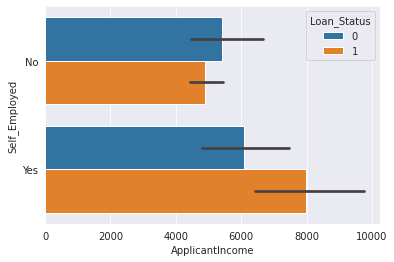

In [26]:
sns.barplot(data=train_df, x='ApplicantIncome', y='Self_Employed', hue='Loan_Status')

**Insight:** Self_Employed and higher Income Applicants have higher chances for loan approval.

## Data Processing

**Handle Missing values**
*   Impute with MEDIAN for continuous variables.
*   Impute with MODE for categorical variables.


In [27]:
#Handle missing data in training dataset
train_df['Gender'].fillna(value=train_df['Gender'].dropna().mode()[0], inplace=True)
train_df['Married'].fillna(value=train_df['Married'].dropna().mode()[0], inplace=True)
train_df['Dependents'].fillna(value='1', inplace=True) #since dtype is object
train_df['Credit_History'].fillna(value=train_df['Credit_History'].dropna().mode()[0], inplace=True)
train_df['Self_Employed'].fillna(value=train_df['Self_Employed'].dropna().mode()[0], inplace=True)
train_df['LoanAmount'].fillna(value=train_df['LoanAmount'].dropna().mean(), inplace=True)
train_df['Loan_Amount_Term'].fillna(value=0, inplace=True)

In [28]:
#Handle missing data in test_df
test_df['Gender'].fillna(value=test_df['Gender'].dropna().mode()[0], inplace=True)
test_df['Married'].fillna(value=test_df['Married'].dropna().mode()[0], inplace=True)
test_df['Dependents'].fillna(value='1', inplace=True) #since dtype is object
test_df['Credit_History'].fillna(value=test_df['Credit_History'].dropna().mode()[0], inplace=True)
test_df['Self_Employed'].fillna(value=test_df['Self_Employed'].dropna().mode()[0], inplace=True)
test_df['LoanAmount'].fillna(value=test_df['LoanAmount'].dropna().mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(value=0, inplace=True)

In [29]:
#missing data
null_total = train_df.isnull().sum().sort_values(ascending=False)
null_percent = train_df.isnull().sum()/test_df.shape[0]*100
null_percent = pd.concat([null_total, null_percent], axis=1, keys=['Total', 'Percent'])
null_percent.head(20)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


**Insight:** No more missing data.

**Handle ordered categorical data**
*   Use label encoding for ordered categorical data.

In [30]:
cat_feat_le = cat_feat.copy()
print("Feature for label encoding are {}".format(cat_feat_le))
#remove the dependents feature as it will be One Hot Encoded later
cat_feat_le.remove('Dependents')

#Applying label encoding
def label_encoding(dataset, columns):
    label_encoder = preprocessing.LabelEncoder()
    for col in columns:
        dataset[col] = label_encoder.fit_transform(dataset[col])
        dataset[col].astype(int)
    return dataset

#Convert all categorical variables to number
train_df = label_encoding(train_df, cat_feat_le)

cat_feat_le.remove('Loan_Status')
#Convert all categorical variables to number for test df
test_df = label_encoding(test_df, cat_feat_le)

Feature for label encoding are ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [31]:
train_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [32]:
#Handle Dependents as '0' - no dependents and '1' - has dependents
print("Unique terms before for dependents are {}".format( train_df['Dependents'].unique()))
train_df['Dependents'] = train_df['Dependents'].map( {'0': 0, '1': 1, '2':1, '3+':1}).astype(int)
test_df['Dependents'] = test_df['Dependents'].map( {'0': 0, '1': 1, '2':1, '3+':1}).astype(int)
print("Unique terms after for dependents are {}".format( train_df['Dependents'].unique()))

Unique terms before for dependents are ['0' '1' '2' '3+']
Unique terms after for dependents are [0 1]


In [33]:
train_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,   0., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [34]:
#Since Loan_Amount_Term is max for '360' we handle this column
#as '1' - has term as 360 and '0' - has term other than 360
#Handle for training data
train_df['Loan_Amount_Term'] = [1 if (train_df['Loan_Amount_Term'][index]==360) else 0 for index, value in train_df['Loan_Amount_Term'].items() ]
train_df['Loan_Amount_Term'].astype(int)
train_df['Credit_History'] = train_df['Credit_History'].astype(int)

#Similarly, handling coapplicant income as '1' - has coapplicant income and '0' - no coapplicant income
train_df['CoapplicantIncome'] = [0 if (train_df['CoapplicantIncome'][index]==0) else 1 for index, value in train_df['CoapplicantIncome'].items() ]
train_df['CoapplicantIncome'].astype(int)
print("Unique terms after for Loan_Amount_Term are {}".format( train_df['Loan_Amount_Term'].unique()))

Unique terms after for Loan_Amount_Term are [1 0]


In [35]:
#Handle for test data
test_df['Loan_Amount_Term'] = [1 if (test_df['Loan_Amount_Term'][index]==360) else 0 for index, value in test_df['Loan_Amount_Term'].items() ]
test_df['Loan_Amount_Term'].astype(int)
test_df['Credit_History'] = test_df['Credit_History'].astype(int)
test_df['CoapplicantIncome'] = [0 if (test_df['CoapplicantIncome'][index]==0) else 1 for index, value in test_df['CoapplicantIncome'].items() ]
test_df['CoapplicantIncome'].astype(int) 
print("Unique terms after for Loan_Amount_Term are {}".format( train_df['Loan_Amount_Term'].unique()))

Unique terms after for Loan_Amount_Term are [1 0]


**Handle non-ordered categorical data**
*   Use One Hot encoding for non-ordered categorical data.

In [36]:
#categorical features not ordinal for one hot encoding
cat_feat_ohe = ['Property_Area']
df_ohe = pd.DataFrame(train_df[cat_feat_ohe])

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_ohe))

# One-hot encoding removed index; put it back
OH_cols.index = df_ohe.index
OH_cols.columns = OH_encoder.get_feature_names()

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_df.drop(df_ohe, axis=1)

#OH_cols_train = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 

# Add one-hot encoded columns to numerical features
OH_cols = OH_cols.astype(int)
OH_X_train = pd.concat([num_X_train, OH_cols], axis=1)

train_df = OH_X_train
train_df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,x0_0,x0_1,x0_2
Loan_ID,,,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0,146.412162,1,1,1,0,0,1


In [37]:
#categorical features not ordinal for one hot encoding for testing
cat_feat_ohe = ['Property_Area']
df_ohe = pd.DataFrame(test_df[cat_feat_ohe])

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_ohe))

# One-hot encoding removed index; put it back
OH_cols.index = df_ohe.index
OH_cols.columns = OH_encoder.get_feature_names()

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = test_df.drop(df_ohe, axis=1)

#OH_cols_train = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 

# Add one-hot encoded columns to numerical features
OH_cols = OH_cols.astype(int)
OH_X_train = pd.concat([num_X_train, OH_cols], axis=1)

test_df = OH_X_train
test_df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,x0_0,x0_1,x0_2
Loan_ID,,,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,1,1,0,0,1


**Converting Categorical variables to category type**

In [38]:
train_df[['Gender', 'Married', 'Education', 'Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term']] = train_df[['Gender', 'Married', 'Education', 'Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term']].astype(int)
test_df[['Gender', 'Married', 'Education', 'Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term']] = test_df[['Gender', 'Married', 'Education', 'Self_Employed', 'CoapplicantIncome', 'Loan_Amount_Term']].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    int64  
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  x0_0               614 non-null    int64  
 12  x0_1               614 non-null    int64  
 13  x0_2               614 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 92.0+ KB


---
**Outliers Detection**
---

**Function to detect outliers using Tukey's method**

In [39]:
# list of numerical variables
num_feat = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
print('numerical variables: ', num_feat)

numerical variables:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [40]:
def detect_outliers(df, features, no_of_outlier_in_row, threshold=1.5):
  """
  Input - dataframe of features 
  output - feature wise list of the indices and count
  Procedure - Tukey method.
  """
  outliers = []
  
  # iterate over features(columns)
  for col in features:
    # 1st quartile (25%)
    Q1 = df[col].quantile(0.25)

    # 3rd quartile (75%)
    Q3 = df[col].quantile(0.75)

    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # outlier step
    outlier_step = threshold * IQR

    #calculate lower limit
    lower_limit = Q1 - outlier_step

    #calculate upper limit
    upper_limit = Q3 + outlier_step
    
    # Determine a list of indices of outliers for feature col
    outlier_list_col = df[(df[col] < lower_limit) | 
                          (df[col] > upper_limit )].index
    
    if (len(outlier_list_col) > 0):
      outliers.append({'Feature': col, 'No_of_outliers':len(outlier_list_col)})#, 'Outlier_rows':outlier_list_col})
     
  #print('Num of outlier detected:', outliers)

  return outliers

In [41]:
# detect outliers from all numeric columns, this return the dictionary of indices and column number
outliers = detect_outliers(train_df, num_feat, 0)

print(tabulate(outliers))

out_val = 0
for ind, val in enumerate(outliers):
  out_val += val.get('No_of_outliers')
print("Total                 {}".format(out_val))

---------------  --
ApplicantIncome  50
LoanAmount       41
---------------  --
Total                 91


**Outlier Treatment** 

Since data is left skewed, use log transformation which doesn't effect affect the smaller values much but reduces the larger values, thereby nullifying the effect of higher values and making the distribution normal.


In [42]:
# Perform log transformation of LoanAmount, ApplicantIncome to make it closer to normal for treating outliers
train_df['LoanAmount'] = np.log1p(train_df['LoanAmount'])
train_df['ApplicantIncome'] = np.log1p(train_df['ApplicantIncome']) 

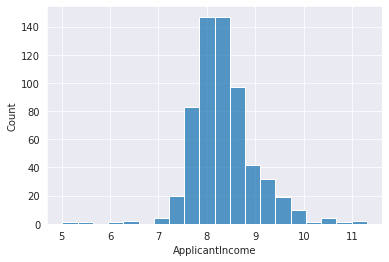

In [43]:
# distribtion of LoanAmount, ApplicantIncome log
sns.histplot(data=train_df, x='ApplicantIncome', bins=20)

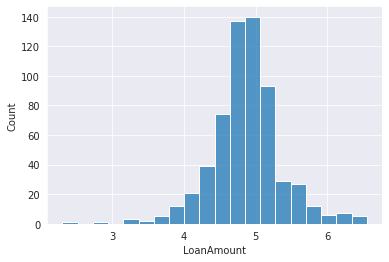

In [44]:
sns.histplot(data=train_df, x='LoanAmount', bins=20)

**Insight:** 
Features LoanAmount and ApplicantIncome are now nearly normal.

In [45]:
# Perform log transformation of LoanAmount, ApplicantIncome 
#to make it closer to normal for treating outliers ON test_df
test_df['LoanAmount'] = np.log1p(test_df['LoanAmount'])
test_df['ApplicantIncome'] = np.log1p(test_df['ApplicantIncome'])

### **Feature Selection - Statistical analysis of features**

**For numeric features using ANOVA**

*   Null Hypothesis (H0) : There is no relation between the given feature and the target
*   Alternate Hypothesis (H1) : There is relation between the given feature and the target

In [46]:
# split into input (X) and output (y) variables
X = train_df.copy()
X.drop(target_var, axis=1, inplace=True)
y = y

#features selected list
sel_feat = []

#configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
#learn relationship from training data
fs.fit(X, y)

print('##### ANOVA Test Results for Numeric Features ##### \n')
#check the p-values for the features
for i in range(len(fs.pvalues_)):
  p_value = fs.pvalues_[i]
  feature = X.columns[i]
  if(feature in num_feat):
    #If the p-value is <0.05, reject H0
    if (p_value < 0.05):
      print(('Feature %s: is correlated with %s | P-Value: %f' % (feature, target_var, p_value)))
      sel_feat.append(feature)
    else:
      print(('Feature %s: is NOT correlated with %s | P-Value: %f' % (feature, target_var, p_value)))
      
print('Features selected are : ', sel_feat)

##### ANOVA Test Results for Numeric Features ##### 

Feature ApplicantIncome: is NOT correlated with Loan_Status | P-Value: 0.786393
Feature CoapplicantIncome: is NOT correlated with Loan_Status | P-Value: 0.062695
Feature LoanAmount: is NOT correlated with Loan_Status | P-Value: 0.297269
Features selected are :  []


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**For categorical features using chi2**

*   Null Hypothesis (H0) : There is no relation between the given feature and the target
*   Alternate Hypothesis (H1) : There is relation between the given feature and the target

In [47]:
# split into input (X) and output (y) variables
X = train_df.copy()
X.drop(target_var, axis=1, inplace=True)
y = y

#configure to select all features
fs = SelectKBest(score_func=chi2, k='all')
#learn relationship from training data
fs.fit(X, y)

print('##### chi2 Test Results for categorical Features ##### \n')
#check the p-values for the features
for i in range(len(fs.pvalues_)):
  p_value = fs.pvalues_[i]
  feature = X.columns[i]
  if(feature not in num_feat):
    #If the p-value is <0.05, reject H0
    if (p_value < 0.05):
      print(('Feature %s: is correlated with %s | P-Value: %f' % (feature, target_var, p_value)))
      sel_feat.append(feature)
    else:
      print(('Feature %s: is NOT correlated with %s | P-Value: %f' % (feature, target_var, p_value)))
      
print('\nFeatures selected are : ', sel_feat)

##### chi2 Test Results for categorical Features ##### 

Feature Gender: is NOT correlated with Loan_Status | P-Value: 0.849032
Feature Married: is NOT correlated with Loan_Status | P-Value: 0.181852
Feature Dependents: is NOT correlated with Loan_Status | P-Value: 0.907577
Feature Education: is NOT correlated with Loan_Status | P-Value: 0.059887
Feature Self_Employed: is NOT correlated with Loan_Status | P-Value: 0.931982
Feature Loan_Amount_Term: is NOT correlated with Loan_Status | P-Value: 0.498252
Feature Credit_History: is correlated with Loan_Status | P-Value: 0.000000
Feature x0_0: is correlated with Loan_Status | P-Value: 0.035717
Feature x0_1: is correlated with Loan_Status | P-Value: 0.007695
Feature x0_2: is NOT correlated with Loan_Status | P-Value: 0.375937

Features selected are :  ['Credit_History', 'x0_0', 'x0_1']


## **Machine Learning**

**Splitting the data into Training and Testing sample**

In [48]:
X = train_df[[feature for feature in sel_feat]]
y = train_df['Loan_Status']

# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

**Logistic Regression using Pipeline**

In [49]:
#make pipeline
model = Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())])

#use 10-fold cross valiation for better results on training data
cv = KFold(n_splits=10, random_state=7, shuffle=True)
cv_score = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# fit the model on train set
model.fit(X_train, y_train)

#predict the results
y_pred = model.predict(X_test)

**Check the metrics**

Тrain accuracy: 81.26272912423626
Тest accuracy: 79.67479674796748
for 10-fold Cross Validation cross_val_score:  81.25714285714285

               precision    recall  f1-score   support

           0       0.86      0.45      0.59        40
           1       0.78      0.96      0.86        83

    accuracy                           0.80       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.81      0.80      0.78       123



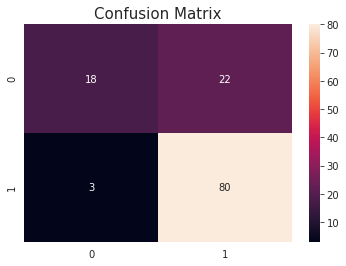

In [50]:
print(f"Тrain accuracy: {model.score(X_train, y_train)*100}\nТest accuracy: {model.score(X_test, y_test)*100}")

print("for 10-fold Cross Validation cross_val_score: ", cv_score.mean()*100)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True).set_title('Confusion Matrix', fontsize = 15)

# print classification report
print("\n", classification_report(y_test, y_pred))

**Model Building Outcomes**
*   LogisticRegression produces around 80% accuracy.
*   Diagonal in confusion matrix have high values of 18 and 80 (which is good).